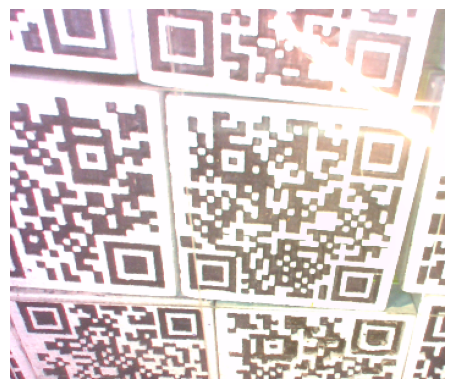

In [ ]:
import cv2 
from pyzbar.pyzbar import decode
from matplotlib import pyplot as plt

img = cv2.imread(r"/mnt/c/Users/user/Documents/c_stuff/Python/ISE/ID-project/indiv_1.png")
offset = 50
cropped = img[int(img.shape[0]/5)-offset:int(img.shape[0]*4/5)-offset]
cropped = cropped[:,int(img.shape[1]/20)-offset:int(img.shape[1]*19/20)-offset] 
cropped = img
plt.imshow(img)
plt.axis('off')
plt.show()

In [231]:
PATH = r"/mnt/c/Users/user/Documents/c_stuff/Python/ISE/ID-project/indiv_1.png"
os.path.splitext(PATH)[0]+"_processed"+os.path.splitext(PATH)[1]

'/mnt/c/Users/user/Documents/c_stuff/Python/ISE/ID-project/indiv_1_processed.png'

138.2400202976996


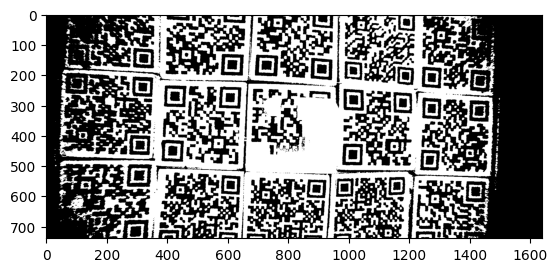

In [87]:
cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2HSV)
# cropped[:,:,1] = 0
avgValue = cropped[:,:,2].mean()
print(avgValue)
# Apply threshold and assign result to the V channel
_, thresh_v = cv2.threshold(cropped[:,:,2], int(avgValue), 255, cv2.THRESH_BINARY_INV)
cropped[:,:,2] = thresh_v
# print(cropped)
cropped = cv2.cvtColor(cropped, cv2.COLOR_HSV2BGR)
plt.imshow(cropped)

In [240]:
cropped.shape

(739, 1476, 3)

103.96873957058627
1


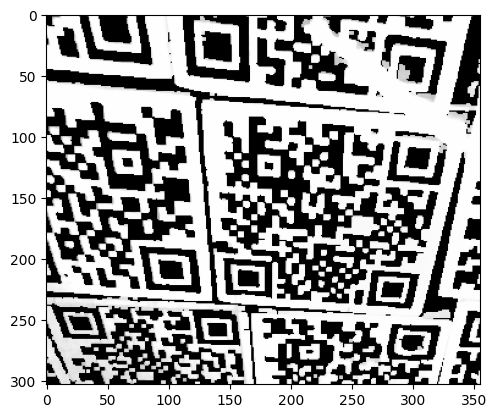

In [253]:

new = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# cropped[:,:,1] = 0
# Use adaptive thresholding on the V channel
thresh_v = cv2.adaptiveThreshold(
    new[:, :, 2],
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    51,
    2
)
new[:, :, 2] = thresh_v
print(avgValue)

avgValue = new[:,:,2].mean()
# Apply threshold and assign result to the V channel
_, thresh_v = cv2.threshold(new[:,:,2], int(avgValue), 255, cv2.THRESH_BINARY_INV)
new[:,:,2] = thresh_v
# print(cropped)
new = cv2.cvtColor(new, cv2.COLOR_HSV2BGR) #these three lines can me refactored into one, im too lazy tho
new = cv2.cvtColor(new, cv2.COLOR_BGR2GRAY)
new = cv2.cvtColor(new, cv2.COLOR_GRAY2BGR) 
iterations = max(max(cropped.shape[0], cropped.shape[1]) // 500 ,1)# adaptive iteration
print(iterations)
new = cv2.erode(new, None, iterations=iterations) # * lower iterations to 1 if image is small
new = cv2.dilate(new, None, iterations=iterations) # * lower iterations to 1 if image is small
plt.imshow(new,cmap='gray')

32


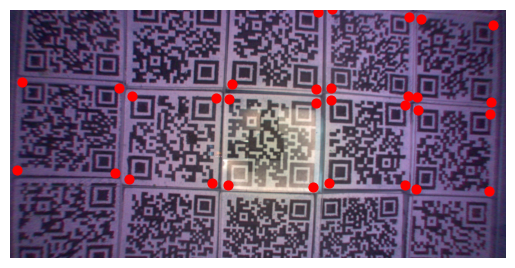

In [249]:

# Convert BGR (OpenCV default) to RGB for correct display
# offset = 30
# cropped = img[int(img.shape[0]/5)-offset:int(img.shape[0]*4/5)-offset] 
polys = [x.polygon for x in decode(new)]
points = []
square = []
for x in polys:
    if len(x) == 4:
        square.append(x)
    for i in range(len(x)):
        points.append(x[i])
pairs = [[x.x, x.y] for x in points]

print(len(pairs))
if len(pairs) > 0:
    for x, y in pairs:
        plt.scatter(x, y, c='red', s=40)

plt.imshow(cropped)
plt.axis('off')
plt.show()

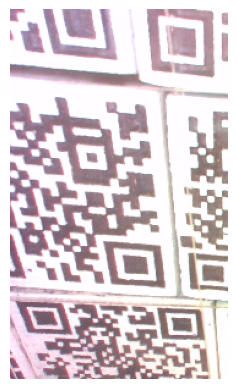

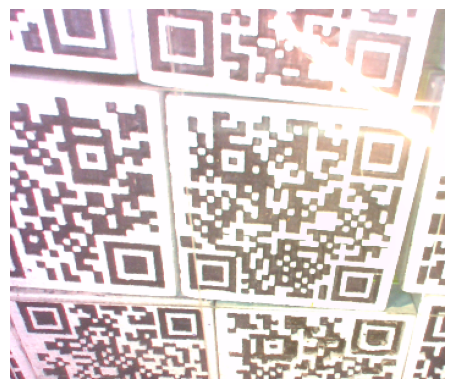

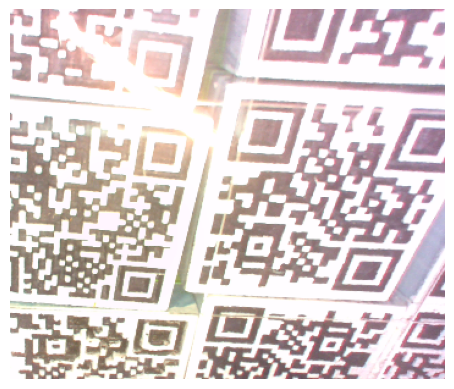

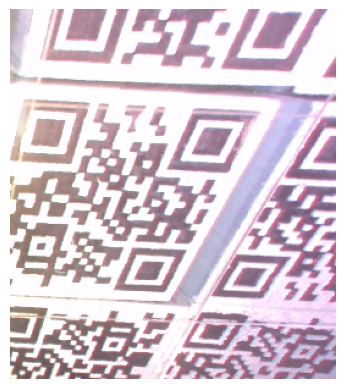

In [ ]:
def cropSlice(cropped:np.ndarray, sliceNum=5,pad=1/8,write=False,numOffset=0):
    croppedArray = []
    imgPaths = []
    sliceNum = 4
    pad = 1/8
    for i in range(sliceNum):
        croppedImg = cropped[:,abs(int((cropped.shape[1]*i/sliceNum)-cropped.shape[1]*pad)):int((cropped.shape[1]*(i+1)/sliceNum)+cropped.shape[1]*pad)]
        croppedArray.append(croppedImg)
        if write:
            imgPaths.append(f"indiv_{i+numOffset+1}.png")
            cv2.imwrite(f"indiv_{i+numOffset+1}.png",croppedImg)
    return croppedArray, imgPaths
cropSlice(cropped,sliceNum=4,write=True)

In [195]:
!ls

1_backup.png	 camera_calibration_data.json  image_3.png  indiv_3.png
2_backup.png	 gameWindow.py		       image_4.png  playground.ipynb
Assemble.py	 gpioTest.py		       image_5.png  simple_camera.py
ID_servo	 image1.jpg		       indiv_0.png  ui_interface
calibration	 image_1.png		       indiv_1.png
camCalibrate.py  image_2.png		       indiv_2.png


In [170]:
indiCrop

array([], shape=(0, 711, 3), dtype=uint8)

In [163]:
decode(corrected)

[Decoded(data=b'emptyPath', type='QRCODE', rect=Rect(left=794, top=884, width=229, height=259), polygon=[Point(x=794, y=1130), Point(x=984, y=1143), Point(x=1023, y=906), Point(x=817, y=884)], quality=1, orientation='LEFT'),
 Decoded(data=b'monkeyStartPoint', type='QRCODE', rect=Rect(left=336, top=875, width=212, height=266), polygon=[Point(x=336, y=875), Point(x=341, y=1125), Point(x=541, y=1141), Point(x=548, y=891)], quality=1, orientation='UP'),
 Decoded(data=b'emptyPath', type='QRCODE', rect=Rect(left=569, top=898, width=213, height=260), polygon=[Point(x=569, y=1140), Point(x=761, y=1158), Point(x=782, y=921), Point(x=578, y=898)], quality=1, orientation='DOWN'),
 Decoded(data=b'emptyPath', type='QRCODE', rect=Rect(left=288, top=528, width=233, height=318), polygon=[Point(x=288, y=528), Point(x=295, y=821), Point(x=507, y=846), Point(x=521, y=562)], quality=1, orientation='LEFT')]

In [74]:
cropped.shape

(303, 711, 3)

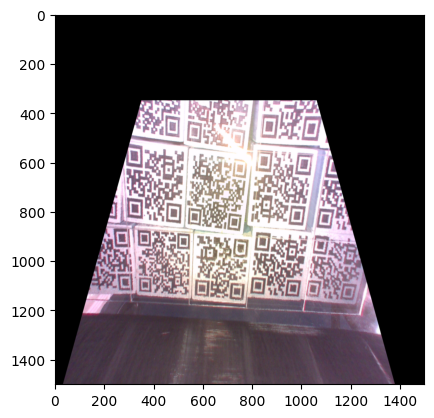

In [162]:
import numpy as np
def perspTransform(image,offA=100,offB=300,shift = 350):
    offA = 100
    offB = 300
    shift = 350
    pts1 = np.float32([[0, 0], [image.shape[1], 0],
                        [offA, offB], [image.shape[1]-offA, offB]])
    pts2 = np.float32([[0, 0], [image.shape[1], 0],
                        [0, image.shape[0]], [image.shape[1], image.shape[0]]]) + shift

    # Apply Perspective Transform Algorithm
    matrix = cv2.getPerspectiveTransform(pts1, pts2)

    # Apply Perspective Transform Algorithm
    result = cv2.warpPerspective(img, matrix, (1500, 1500), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    return result
corrected = perspTransform(img)
plt.imshow(corrected)

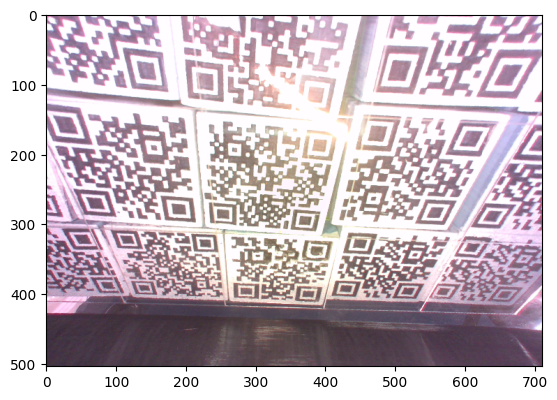

In [89]:
plt.imshow(img)

In [45]:
len(cropped[0])

711

[[421, 224], [-9, 59]]

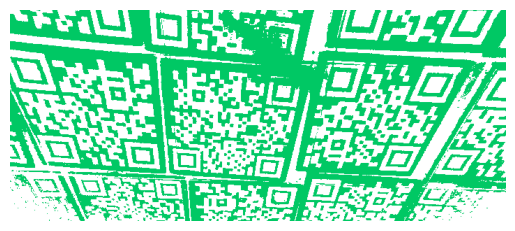

In [32]:
edges = cv2.threshold(cropped, 240, 255, cv2.THRESH_BINARY_INV)[1]
# Replace all non-zero pixels with green ([0, 255, 0])
edges_green = edges.copy()
edges_green[(edges_green == 0).any(axis=2)] = [0, 200, 100]
plt.imshow(edges_green)
plt.axis('off')
plt.show()

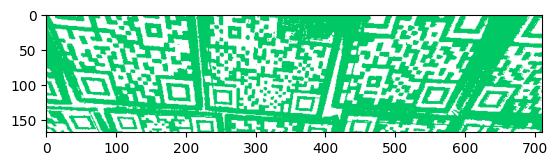

In [22]:
edgesCropped = edges_green[int(edges_green.shape[0]/3):int(edges_green.shape[0]*2/3)]
# edgesCropped = edgesCropped[:, int(edgesCropped.shape[1]/3):int(edgesCropped.shape[1]*2/3)]
plt.imshow(edgesCropped)

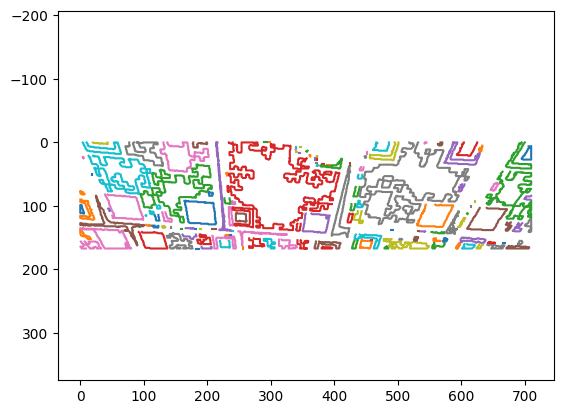

In [119]:

# edgesCropped_gray = cv2.bitwise_not(cv2.cvtColor(edgesCropped, cv2.COLOR_BGR2GRAY))
edgesCropped_gray = cv2.cvtColor(edgesCropped, cv2.COLOR_BGR2GRAY)
filtered = edgesCropped_gray.copy()
filtered[filtered == 0] = 255
filtered[filtered != 255] = 0
contours,_ = cv2.findContours(filtered, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    plt.plot(cnt[:, 0, 0], cnt[:, 0, 1])
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()

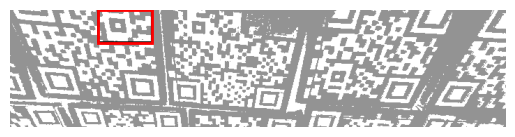

In [120]:
max_area = 0
best_rect = None
for cnt in contours:
    x, y, w_rect, h_rect = cv2.boundingRect(cnt)
    area = w_rect * h_rect
    if area > max_area and area < 5000:  # Filter out small areas/
        max_area = area
        best_rect = (x, y, w_rect, h_rect)

# Draw rectangle on a copy of the image
img_rect = edgesCropped_gray.copy()
if best_rect is not None:
    x, y, w_rect, h_rect = best_rect
    rect= cv2.rectangle(img_rect, (x, y), (x + w_rect, y + h_rect), (0, 0, 255), 2)

    # Plot and show rectangle on top of img_rect
    fig, ax = plt.subplots()
    ax.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB), cmap='gray')
    if best_rect is not None:
        x, y, w_rect, h_rect = best_rect
        rect_patch = plt.Rectangle((x, y), w_rect, h_rect, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect_patch)
    ax.axis('off')
    plt.show()
# Display result
# plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()


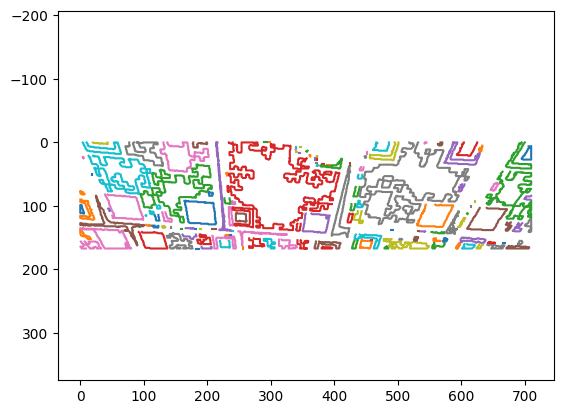

In [ ]:
# Invert image: dark becomes white, white becomes black
inv = cv2.bitwise_not(edgesCropped)

# Threshold to get binary image (dark regions become white)
_, binary = cv2.threshold(inv, 30, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find largest rectangle contour by area
max_area = 0
best_rect = None
for cnt in contours:
    x, y, w_rect, h_rect = cv2.boundingRect(cnt)
    area = w_rect * h_rect
    if area > max_area:
        max_area = area
        best_rect = (x, y, w_rect, h_rect)

# Draw rectangle on a copy of the image
img_rect = img.copy()
if best_rect is not None:
    x, y, w_rect, h_rect = best_rect
    cv2.rectangle(img_rect, (x, y), (x + w_rect, y + h_rect), (0, 0, 255), 2)

# Display result
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/contours_new.cpp:327: error: (-2:Unspecified error) in function 'static std::shared_ptr<ContourScanner_> ContourScanner_::create(cv::Mat, int, int, cv::Point)'
> Modes other than RETR_FLOODFILL and RETR_CCOMP support only CV_8UC1 images (expected: 'img.type() == CV_8UC1'), where
>     'img.type()' is 16 (CV_8UC3)
> must be equal to
>     'CV_8UC1' is 0 (CV_8UC1)
